In [33]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import datetime 
import seaborn as sns
#Swifter package allows to run the 'apply' function 10 times quicker
import swifter 
#Allows to plot figures in the notebook
%matplotlib inline 
#Allows the TAB completion
%config Completer.use_jedi = False 

In [34]:
#assign always returns a copy of the data, leaving the original DataFrame untouched.
#df.columns = [x.lower() for x in df.columns]

In [35]:
df = pd.read_csv("COVID19WW.csv")

# Treat NAN values

In [36]:
df.isnull().sum()

country                         0
country_code                    0
year_week                       0
source                          0
new_cases                      23
number_sequenced                0
percent_cases_sequenced        23
valid_denominator               0
variant                         0
number_detections_variant       0
percent_variant              4602
dtype: int64

### Fill the 'new_cases' with the mean of the previous and following week

In [37]:
#Here, we do not want to fill the NaN values from the 'new_cases' by 0 or mean of the whole column. The column contain
#the value of all countries and weeks. Instead i take the mean of the week before and after.

df_null = df[df['new_cases'].isna()]
df2 = pd.concat([df[['country','year_week','new_cases']].ffill(), df[['country','year_week','new_cases']].bfill()]).groupby(['country','year_week']).mean()
df2.reset_index(inplace = True)

In [38]:
df[df['percent_cases_sequenced'].isnull()]

,country,country_code,year_week,source,new_cases,number_sequenced,percent_cases_sequenced,valid_denominator,variant,number_detections_variant,percent_variant
24202,Spain,ES,2021-08,GISAID,NaN,1195,NaN,Yes,B.1.1.7,703,58.8
24203,Spain,ES,2021-08,GISAID,NaN,1195,NaN,Yes,B.1.1.7+E484K,0,0.0
24204,Spain,ES,2021-08,GISAID,NaN,1195,NaN,Yes,B.1.351,10,0.8
24205,Spain,ES,2021-08,GISAID,NaN,1195,NaN,Yes,B.1.427/B.1.429,1,0.1
24206,Spain,ES,2021-08,GISAID,NaN,1195,NaN,Yes,B.1.525,2,0.2
24207,Spain,ES,2021-08,GISAID,NaN,1195,NaN,Yes,B.1.526,0,0.0
24208,Spain,ES,2021-08,GISAID,NaN,1195,NaN,Yes,B.1.616,0,0.0
24209,Spain,ES,2021-08,GISAID,NaN,1195,NaN,Yes,B.1.617,0,0.0
24210,Spain,ES,2021-08,GISAID,NaN,1195,NaN,Yes,B.1.617.1,0,0.0
24211,Spain,ES,2021-08,GISAID,NaN,1195,NaN,Yes,B.1.617.2,0,0.0


##### Now that we filled NaN, we compute the cumulative amount of cases per week and per country

In [39]:
df2["sum_newcases"] = df2.groupby(['country'])['new_cases'].apply(lambda x: x.cumsum())
df2[(df2.country=="Spain")]

,country,year_week,new_cases,sum_newcases
1176,Spain,2020-40,65146.0,65146.0
1177,Spain,2020-41,75556.0,140702.0
1178,Spain,2020-42,85481.0,226183.0
1179,Spain,2020-43,123871.0,350054.0
1180,Spain,2020-44,142377.0,492431.0
1181,Spain,2020-45,140521.0,632952.0
1182,Spain,2020-46,115646.0,748598.0
1183,Spain,2020-47,85752.0,834350.0
1184,Spain,2020-48,65571.0,899921.0
1185,Spain,2020-49,54141.0,954062.0


In [40]:
#[(df.country=="Spain") & (df.year_week == "2021-08")]

##### Create a temporate DF to merge with df2. We also compute the amount of number_sequenced per week and countries.

In [41]:
df_tmp = df.drop_duplicates(subset=['country', 'year_week'],keep='first').sort_index()
df_tmp.drop(['valid_denominator', 'variant', 'source','number_detections_variant', 'percent_variant','percent_cases_sequenced'], axis = 1,inplace = True)
df_tmp['sum_number_sequenced'] = df_tmp.groupby(['country'])['number_sequenced'].apply(lambda x: x.cumsum())
df_tmp['new_cases'] = df_tmp['new_cases'].fillna(value=0)
df_tmp[(df_tmp.country=="Spain")]

,country,country_code,year_week,new_cases,number_sequenced,sum_number_sequenced
23845,Spain,ES,2020-40,65146.0,259,259
23862,Spain,ES,2020-41,75556.0,242,501
23879,Spain,ES,2020-42,85481.0,378,879
23896,Spain,ES,2020-43,123871.0,217,1096
23913,Spain,ES,2020-44,142377.0,153,1249
23930,Spain,ES,2020-45,140521.0,194,1443
23947,Spain,ES,2020-46,115646.0,196,1639
23964,Spain,ES,2020-47,85752.0,198,1837
23981,Spain,ES,2020-48,65571.0,141,1978
23998,Spain,ES,2020-49,54141.0,313,2291


###### Now we merge we df2 (we need the sum_new_cases to compute the sum_percent)

In [42]:
df_sum = pd.merge(left=df2, right=df_tmp, left_on=['country','year_week'], right_on=['country','year_week'], how='left')
df_sum.drop(['new_cases_y'], axis = 1, inplace = True)
df_sum.rename(columns = {'new_cases_x':'new_cases'}, inplace = True)
df_sum['sum_sequenced_pct'] =  np.divide(np.multiply(df_sum['sum_number_sequenced'],100), df_sum['sum_newcases'])
df_sum['pct_sequenced_week'] = np.divide(np.multiply(df_sum['number_sequenced'], 100), df_sum['new_cases'])
df_sum[(df_sum.country=="Spain")]

,country,year_week,new_cases,sum_newcases,country_code,number_sequenced,sum_number_sequenced,sum_sequenced_pct,pct_sequenced_week
1176,Spain,2020-40,65146.0,65146.0,ES,259,259,0.397569,0.397569
1177,Spain,2020-41,75556.0,140702.0,ES,242,501,0.356072,0.320292
1178,Spain,2020-42,85481.0,226183.0,ES,378,879,0.388623,0.442204
1179,Spain,2020-43,123871.0,350054.0,ES,217,1096,0.313095,0.175182
1180,Spain,2020-44,142377.0,492431.0,ES,153,1249,0.253640,0.107461
1181,Spain,2020-45,140521.0,632952.0,ES,194,1443,0.227979,0.138058
1182,Spain,2020-46,115646.0,748598.0,ES,196,1639,0.218943,0.169483
1183,Spain,2020-47,85752.0,834350.0,ES,198,1837,0.220171,0.230898
1184,Spain,2020-48,65571.0,899921.0,ES,141,1978,0.219797,0.215034
1185,Spain,2020-49,54141.0,954062.0,ES,313,2291,0.240131,0.578120


#### Add column with the date as datetime type (for tableau)

In [43]:
df_sum['new_date_format'] = df_sum.year_week.astype(str).swifter.apply(lambda x: datetime.datetime.strptime( x + '-1', "%Y-%W-%w"))
df_sum

Pandas Apply:   0%|          | 0/1260 [00:00<?, ?it/s]

,country,year_week,new_cases,sum_newcases,country_code,number_sequenced,sum_number_sequenced,sum_sequenced_pct,pct_sequenced_week,new
0,Austria,2020-40,5152.0,5152.0,AT,4,4,0.077640,0.077640,2020-10-05
1,Austria,2020-41,7365.0,12517.0,AT,24,28,0.223696,0.325866,2020-10-12
2,Austria,2020-42,9574.0,22091.0,AT,41,69,0.312344,0.428243,2020-10-19
3,Austria,2020-43,16979.0,39070.0,AT,38,107,0.273867,0.223806,2020-10-26
4,Austria,2020-44,28574.0,67644.0,AT,51,158,0.233576,0.178484,2020-11-02
...,...,...,...,...,...,...,...,...,...,...
1255,Sweden,2021-24,2840.0,994875.0,SE,1577,73094,7.347054,55.528169,2021-06-14
1256,Sweden,2021-25,1980.0,996855.0,SE,695,73789,7.402180,35.101010,2021-06-21
1257,Sweden,2021-26,1864.0,998719.0,SE,164,73953,7.404786,8.798283,2021-06-28
1258,Sweden,2021-27,1508.0,1000227.0,SE,1,73954,7.393722,0.066313,2021-07-05


In [44]:
df_sum.to_csv('Covid_Clean_DS.csv', index = False)
#df.fillna(df.mean().astype(int))
#df.new_cases.mean().astype(int)

# Basic plotting representation, follow up on Tableau

##  PCA plotting

####   Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales
####     For the transformation of the data onto unit scale: mean=0 and variance=1

In [45]:
#####Here trying PCA all point, then try first and last day see if any changes 

In [48]:
features = ['new_cases','sum_newcases', 'sum_number_sequenced','sum_sequenced_pct', 'pct_sequenced_week']
x = df_sum.loc[:, features].values

In [49]:
y = df_sum.loc[:,['country']].values

In [53]:
df_sum.country.unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
       'Spain', 'Sweden'], dtype=object)

In [54]:
x = StandardScaler().fit_transform(x)

In [55]:
pd.DataFrame(data = x, columns = features).head()

,new_cases,sum_newcases,sum_number_sequenced,sum_sequenced_pct,pct_sequenced_week
0,-0.465866,-0.636151,-0.467634,-0.362840,-0.432305
1,-0.413340,-0.628579,-0.466426,-0.353465,-0.416642
2,-0.360910,-0.618737,-0.464360,-0.347775,-0.410183
3,-0.185153,-0.601282,-0.462447,-0.350245,-0.423082
4,0.090054,-0.571907,-0.459878,-0.352831,-0.425942


In [56]:
#Compute 5 PC, one for each variables I wanna try
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3','PC4','PC5'])
finalDf = pd.concat([principalDf, df_sum[['country']]], axis = 1)


### Verify which PC describes more variation

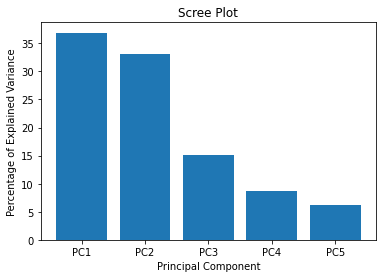

In [57]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

### Plots the 2 best PCs

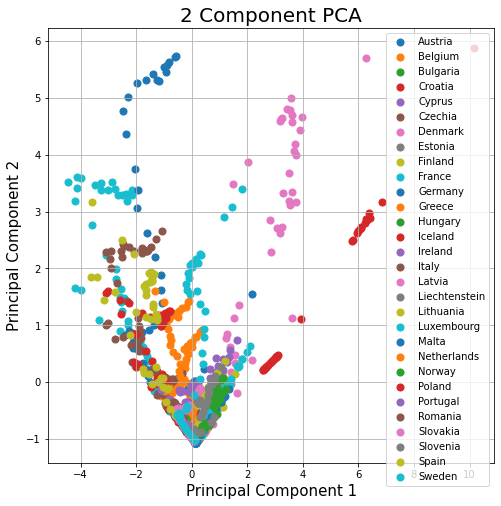

In [58]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = df_sum.country.unique()
NUM_COLORS = len(targets)

for target in targets:
    indicesToKeep = finalDf['country'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , s = 50)
ax.legend(targets)
ax.grid()

In [61]:
TRY CHANGE COLOR FOR EACH COUNTRY PCA

SyntaxError: invalid syntax (<ipython-input-61-148219243bd0>, line 1)

### Check correlation between values

<AxesSubplot:>

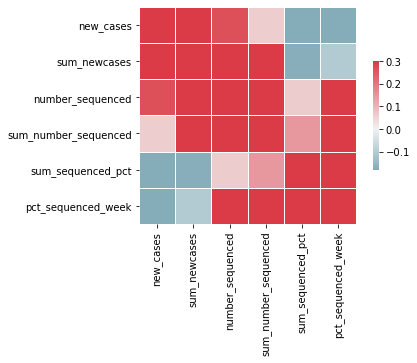

In [196]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_sum[['new_cases','sum_newcases','number_sequenced','sum_number_sequenced','sum_sequenced_pct','pct_sequenced_week']].corr(),
            vmax=.3, center=0, cmap=cmap,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [207]:
#Upload population infos and adding N.A. at NaN values
missing_values=[np.nan,"N.A."]
pop = pd.read_csv("population_by_country_2020.csv",na_values=missing_values)
pop.columns=['country','population','yearly_change','change_net','density','land_area','migrants','fert_rate','median_age',
             'urban_pop_pct','world_share_pct']

In [208]:
#Cleaning the countries name to allow the following merge
pop.loc[(pop.country == "Czech Republic (Czechia)"),'country']='Czechia'

In [209]:
xx = pd.merge(left=df_sum, right=pop, left_on=['country'], right_on=['country'], how='left')
xx[xx.median_age.isnull()]

,country,year_week,new_cases,sum_newcases,country_code,number_sequenced,sum_number_sequenced,sum_sequenced_pct,pct_sequenced_week,new,population,yearly_change,change_net,density,land_area,migrants,fert_rate,median_age,urban_pop_pct,world_share_pct
714,Liechtenstein,2020-40,9.0,9.0,LI,0,0,0.000000,0.000000,2020-10-05,38147,0.29 %,109,238,160,NaN,NaN,NaN,15 %,0.00 %
715,Liechtenstein,2020-41,12.0,21.0,LI,0,0,0.000000,0.000000,2020-10-12,38147,0.29 %,109,238,160,NaN,NaN,NaN,15 %,0.00 %
716,Liechtenstein,2020-42,86.0,107.0,LI,0,0,0.000000,0.000000,2020-10-19,38147,0.29 %,109,238,160,NaN,NaN,NaN,15 %,0.00 %
717,Liechtenstein,2020-43,141.0,248.0,LI,3,3,1.209677,2.127660,2020-10-26,38147,0.29 %,109,238,160,NaN,NaN,NaN,15 %,0.00 %
718,Liechtenstein,2020-44,186.0,434.0,LI,0,3,0.691244,0.000000,2020-11-02,38147,0.29 %,109,238,160,NaN,NaN,NaN,15 %,0.00 %
719,Liechtenstein,2020-45,237.0,671.0,LI,0,3,0.447094,0.000000,2020-11-09,38147,0.29 %,109,238,160,NaN,NaN,NaN,15 %,0.00 %
720,Liechtenstein,2020-46,197.0,868.0,LI,0,3,0.345622,0.000000,2020-11-16,38147,0.29 %,109,238,160,NaN,NaN,NaN,15 %,0.00 %
721,Liechtenstein,2020-47,127.0,995.0,LI,1,4,0.402010,0.787402,2020-11-23,38147,0.29 %,109,238,160,NaN,NaN,NaN,15 %,0.00 %
722,Liechtenstein,2020-48,161.0,1156.0,LI,0,4,0.346021,0.000000,2020-11-30,38147,0.29 %,109,238,160,NaN,NaN,NaN,15 %,0.00 %
723,Liechtenstein,2020-49,123.0,1279.0,LI,2,6,0.469116,1.626016,2020-12-07,38147,0.29 %,109,238,160,NaN,NaN,NaN,15 %,0.00 %


In [210]:
#NaN in Liechtenstein
#Migrants = with a pop of 30k, it's ok to assume 0. It would not impact the model too much
#fert_rate & median_age = Take the average of Europe.
xx.migrants.fillna(0, inplace=True)
xx.fert_rate.fillna(xx.fert_rate.mean(),inplace=True)
xx.median_age.fillna(xx.median_age.mean().astype(int),inplace=True)

#xx[xx.median_age == "N.A."]
xx[xx.country=="Liechtenstein"]

,country,year_week,new_cases,sum_newcases,country_code,number_sequenced,sum_number_sequenced,sum_sequenced_pct,pct_sequenced_week,new,population,yearly_change,change_net,density,land_area,migrants,fert_rate,median_age,urban_pop_pct,world_share_pct
714,Liechtenstein,2020-40,9.0,9.0,LI,0,0,0.000000,0.000000,2020-10-05,38147,0.29 %,109,238,160,0.0,1.572414,42.0,15 %,0.00 %
715,Liechtenstein,2020-41,12.0,21.0,LI,0,0,0.000000,0.000000,2020-10-12,38147,0.29 %,109,238,160,0.0,1.572414,42.0,15 %,0.00 %
716,Liechtenstein,2020-42,86.0,107.0,LI,0,0,0.000000,0.000000,2020-10-19,38147,0.29 %,109,238,160,0.0,1.572414,42.0,15 %,0.00 %
717,Liechtenstein,2020-43,141.0,248.0,LI,3,3,1.209677,2.127660,2020-10-26,38147,0.29 %,109,238,160,0.0,1.572414,42.0,15 %,0.00 %
718,Liechtenstein,2020-44,186.0,434.0,LI,0,3,0.691244,0.000000,2020-11-02,38147,0.29 %,109,238,160,0.0,1.572414,42.0,15 %,0.00 %
719,Liechtenstein,2020-45,237.0,671.0,LI,0,3,0.447094,0.000000,2020-11-09,38147,0.29 %,109,238,160,0.0,1.572414,42.0,15 %,0.00 %
720,Liechtenstein,2020-46,197.0,868.0,LI,0,3,0.345622,0.000000,2020-11-16,38147,0.29 %,109,238,160,0.0,1.572414,42.0,15 %,0.00 %
721,Liechtenstein,2020-47,127.0,995.0,LI,1,4,0.402010,0.787402,2020-11-23,38147,0.29 %,109,238,160,0.0,1.572414,42.0,15 %,0.00 %
722,Liechtenstein,2020-48,161.0,1156.0,LI,0,4,0.346021,0.000000,2020-11-30,38147,0.29 %,109,238,160,0.0,1.572414,42.0,15 %,0.00 %
723,Liechtenstein,2020-49,123.0,1279.0,LI,2,6,0.469116,1.626016,2020-12-07,38147,0.29 %,109,238,160,0.0,1.572414,42.0,15 %,0.00 %


<AxesSubplot:>

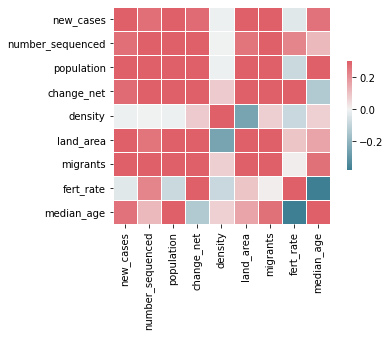

In [215]:
sns.heatmap(xx[['new_cases','number_sequenced','population','yearly_change','change_net',
                'density','land_area','migrants','fert_rate','median_age','urban_pop_pct']].corr(),
            vmax=.3, center=0, cmap=cmap,square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [165]:
#pop.sort_values(by='median_age', ascending=True, na_position='last')[:60]